In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras


In [10]:
mnist = keras.datasets.mnist

In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


In [21]:
train_labels.shape

(60000,)

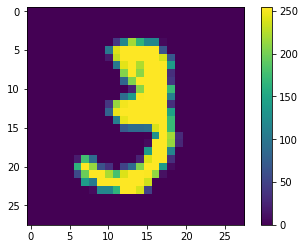

In [24]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)


In [25]:
train_images = train_images/255
test_images = test_images/255

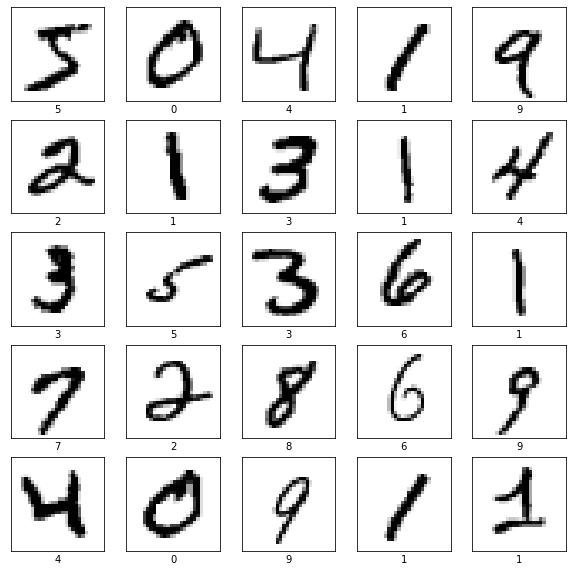

In [27]:
plt.figure(figsize = (10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(train_labels[i])

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)])

In [36]:
model.compile(optimizer= tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [37]:
model.fit(train_images, train_labels, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2682 - accuracy: 0.9229
Epoch 2/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1160 - accuracy: 0.9654
Epoch 3/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0809 - accuracy: 0.9754
Epoch 4/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0590 - accuracy: 0.9818
Epoch 5/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0456 - accuracy: 0.9858
Epoch 6/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0367 - accuracy: 0.9883
Epoch 7/20
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0282 - accuracy: 0.9911
Epoch 8/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0229 - accuracy: 0.9931
Epoch 9/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0186 - accuracy: 0.9944
Epoch 10/2

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.9756


In [39]:
predictions = model.predict(test_images)

In [40]:
predictions[0]

array([1.2181106e-13, 6.7192133e-17, 1.1302238e-11, 1.1364771e-08,
       6.2197914e-22, 1.4882856e-15, 5.0494444e-22, 1.0000000e+00,
       8.6277692e-14, 2.2333744e-09], dtype=float32)

In [45]:
results = []
for i in range(0,10000):
    pred = np.argmax(predictions[i])
    results.append(pred)

In [49]:
results[156]

6

In [50]:
test_labels[156]

6

In [80]:
errlist = []
def errorpredictions(res, testlabels):
    
    correctlist = []
    for i in range(0,10000):
        if res[i] == testlabels[i]:
            correctlist.append(i)
        else:
            errlist.append(i)
    return len(errlist)

In [81]:
errorpredictions(results, test_labels)

244

In [82]:
errlist[2]

217

In [83]:
results[217]

5

In [84]:
test_labels[217]

6

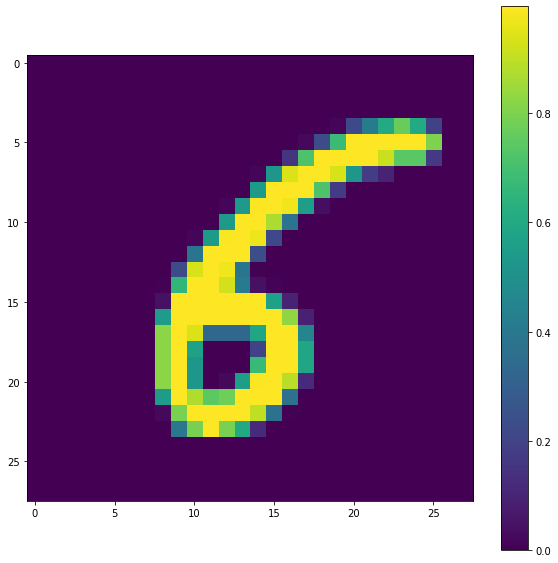

In [86]:
plt.figure(figsize=(10,10))
plt.imshow(test_images[217])
plt.colorbar()
plt.grid(False)